# PCA

In [7]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [8]:
USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
datos = USArrests.data

El set de datos USArrests contiene el porcentaje de asaltos (Assault), asesinatos (Murder) y violaciones (Rape) por cada 100,000 habitantes para cada uno de los 50 estados de USA (1973). Además, también incluye el porcentaje de la población de cada estado que vive en zonas rurales (UrbanPoP).

# PCA

El set de datos USArrests contiene el porcentaje de asaltos (Assault), asesinatos (Murder) y secuestros (Rape) por cada 100,000 habitantes para cada uno de los 50 estados de USA (1973). Además, también incluye el porcentaje de la población de cada estado que vive en zonas rurales (UrbanPoP).



In [11]:
datos.head()

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


## Exploración Inicial

Los dos principales aspectos a tener en cuenta cuando se quiere realizar un PCA es identificar el valor promedio y dispersión de las variables.

La media de las variables muestra que hay tres veces más violaciones que asesinatos y 8 veces más asaltos que violaciones.

In [10]:
datos.mean(axis=0)

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

La varianza es muy distinta entre las variables, en el caso de Assault, la varianza es varios órdenes de magnitud superior al resto.

In [12]:
datos.var(axis=0)

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

Si no se estandarizan las variables para que tengan media cero y desviación estándar de uno antes de realizar el estudio PCA, la variable Assault, que tiene una media y dispersión muy superior al resto, dominará la mayoría de las componentes principales.

La clase sklearn.decomposition.PCA incorpora las principales funcionalidades que se necesitan a la hora de trabajar con modelos PCA. El argumento n_components determina el número de componentes calculados. Si se indica None, se calculan todas las posibles (min(filas, columnas) - 1).

Por defecto, PCA() centra los valores pero no los escala. Esto es importante ya que, si las variables tienen distinta dispersión, como en este caso, es necesario escalarlas. Vamos a usar un StandardScaler() y un PCA().

In [14]:
# Escalado de los datos
scaler = StandardScaler()
datos_escalados = scaler.fit_transform(datos)

In [33]:
# Entrenamiento del modelo PCA
pca = PCA()
pca.fit(datos_escalados)

PCA()

In [34]:
# El modelo PCA entrenado
modelo_pca = pca

Una vez entrenado el objeto PCA, puede accederse a toda la información de las componentes creadas.

Los renglones se corresponden con las componentes principals (ordenadas de mayor a menor varianza explicada). Las filas se corresponden con las variables de entrada.

In [36]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = datos.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4']
)

,Murder,Assault,UrbanPop,Rape
PC1,0.535899,0.583184,0.278191,0.543432
PC2,-0.418181,-0.187986,0.872806,0.167319
PC3,-0.341233,-0.268148,-0.378016,0.817778
PC4,-0.649228,0.743407,-0.133878,-0.089024


Analizar con detalle el vector que forma cada componente puede ayudar a interpretar qué tipo de información recoge cada una de ellas. Por ejemplo, la primera componente es el resultado de la siguiente combinación lineal de las variables originales:

PC1 = 0.535899 * Murder + 0.583184 * Assault + 0.278191 * UrbanPop + 0.543432 * Rape
 
Los pesos asignados en la primera componente a las variables Assault, Murder y Rape son aproximadamente iguales entre ellos y superiores al asignado a UrbanPoP. Esto significa que la primera componente recoge mayoritariamente la información correspondiente a los delitos. En la segunda componente, es la variable UrbanPoP es la que tiene con diferencia mayor peso, por lo que se corresponde principalmente con el nivel de urbanización del estado. Si bien en este ejemplo la interpretación de las componentes es bastante clara, no en todos los casos ocurre lo mismo, sobre todo a medida que aumenta el número de variables.

La influencia de las variables en cada componente puede analizarse visualmente con un gráfico de tipo heatmap.

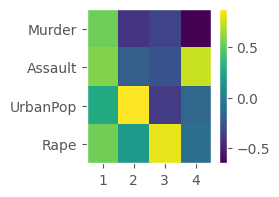

In [37]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(2, 2))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(datos.columns)), datos.columns)
plt.xticks(range(len(datos.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

Una vez calculadas las componentes principales, se puede conocer la varianza explicada por cada una de ellas, la proporción respecto al total y la proporción de varianza acumulada. Esta información está almacenada en los atributos explained_variance_ y explained_variance_ratio_ del modelo.

[0.62006039 0.24744129 0.0891408  0.04335752]


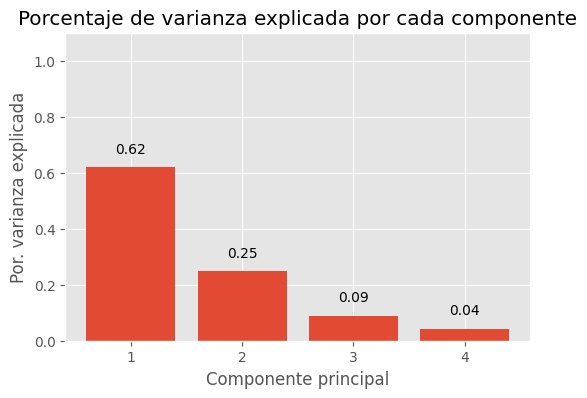

In [39]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(datos.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

En este caso, la primera componente explica el 62% de la varianza observada en los datos y la segunda el 24.7%. Las dos últimas componentes no superan por separado el 1% de varianza explicada.

[0.62006039 0.86750168 0.95664248 1.        ]


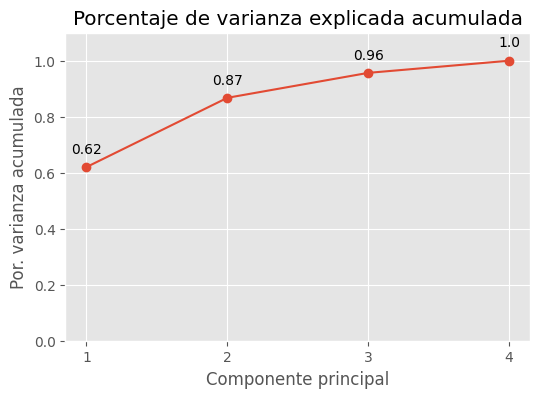

In [41]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(datos.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(datos.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Si se empleasen únicamente las dos primeras componentes se conseguiría explicar el 87% de la varianza observada.

Ahora voy a entrenar de nuevo el modelo para que solo me queden 2 variables.

In [45]:
pca = PCA(n_components=2)
pca.fit(datos_escalados)
modelo_pca = pca

In [46]:
proyecciones = modelo_pca.transform(datos_escalados)

In [47]:
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2'],
    index   = datos.index
)
proyecciones.head()

,PC1,PC2
rownames,,
Alabama,0.985566,-1.133392
Alaska,1.950138,-1.073213
Arizona,1.763164,0.745957
Arkansas,-0.141420,-1.119797
California,2.523980,1.542934


In [48]:
datos.head()

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
